1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

The Global Minima is: [-0.08984183  0.71265608]
The value of function in that point is: -1.031628453488966
There are 6 local minima
If we start from (0,0) point we get the final x as: [0. 0.]




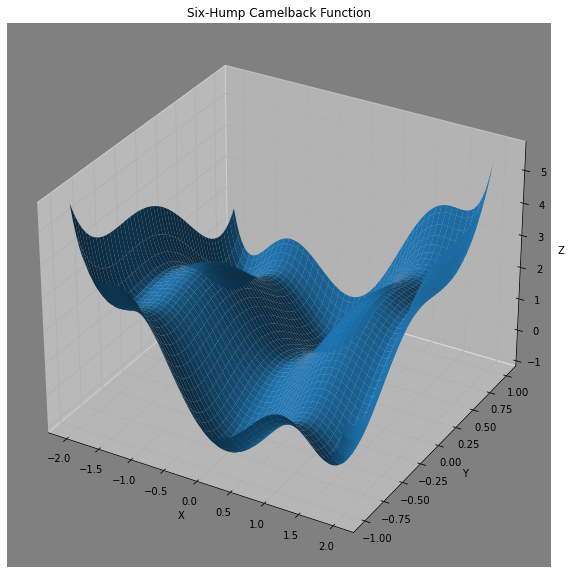

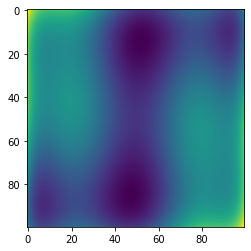

In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def f(x): 
    return (4 - (2.1 * (x[0]**2)) + (x[0]**4)/3)*(x[0]**2) + x[0]*x[1] + (4*(x[1]**2)-4) * (x[1]**2)
result = minimize(f, (0.5, 0.75))
result1= minimize(f, (0,0))
print("The Global Minima is:", result.x)
print("The value of function in that point is:", f(result.x))
print("There are 6 local minima")
print("If we start from (0,0) point we get the final x as:", result1.x)
print("\n")

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

x= np.linspace(-2,2,100)
y= np.linspace(-1,1,100)

X, Y = np.meshgrid(x,y)
Z = (4 - (2.1 * (X**2)) + (X**4)/3)*(X**2) + X*Y + (4*(Y**2)-4) * (Y**2)

ax.plot_surface(X,Y,Z)
ax.set_title('Six-Hump Camelback Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_facecolor("gray")

plt.figure()
c = plt.imshow(Z)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

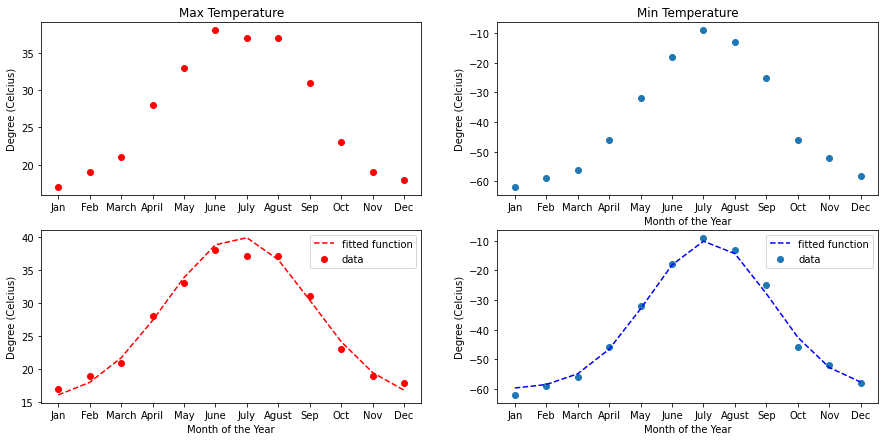

I get reasonable Fits, but it should be mentioned that I myself inserted the values
 for the shift in Y and the amplitude of our gaussian function


In [2]:
from scipy.optimize import curve_fit

Max_T=np.array([17,19,21,28,33,38,37, 37,31,23,19,18])
Min_T=np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58])
Month=np.array(["Jan", "Feb", "March", "April", "May", "June", "July", "Agust", "Sep", "Oct", "Nov", "Dec"])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 7))

ax1.scatter(Month, Max_T, c='r')
ax1.set_ylabel("Degree (Celcius)")
ax1.set_title("Max Temperature")
# ax1.set_ylim(10,50)
# ax1.set_facecolor("gray")
ax2.scatter(Month, Min_T )
ax2.set_xlabel("Month of the Year")
ax2.set_ylabel("Degree (Celcius)")
ax2.set_title("Min Temperature")
# ax2.set_facecolor("gray")


"""Fitting"""

#First for the Max temperatures:
def f(x_data, mu, sig):
    return 25*(np.exp(-(x_data - mu) ** 2 / (2 * sig ** 2))) + 15

x_data = np.arange(1,13) #because the months are not integer and we cant work with them
y_data = Max_T

popt, pcov = curve_fit(f, x_data, y_data, p0=[7,2], maxfev=2000)

ax3.scatter(Month, y_data, c='r', label='data')
ax3.plot(Month, f(x_data, popt[0], popt[1]),'r--', label='fitted function')
ax3.legend(loc='best')
ax3.set_xlabel("Month of the Year")
ax3.set_ylabel("Degree (Celcius)")


#Now for the Min temperature:
def f(x_data, mu, sig):
    return 50*(np.exp(-(x_data - mu) ** 2 / (2 * sig ** 2))) - 60

y_data = Min_T

popt, pcov = curve_fit(f, x_data, y_data, p0=[7,2], maxfev=2000)
ax4.scatter(Month, y_data, label='data')
ax4.plot(Month, f(x_data, popt[0], popt[1]),'b--', label='fitted function')
ax4.legend(loc='best')
ax4.set_ylabel("Degree (Celcius)")
ax4.set_xlabel("Month of the Year")
plt.show()

print("I get reasonable Fits, but it should be mentioned that I myself inserted the values\n for the shift in Y and the amplitude of our gaussian function")

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

R2 = 0.015818454765558654 
R = 0.1257714385922283
Covariance matrix:
 [[1.         0.12577144]
 [0.12577144 1.        ]]
n degrees of freedom = 1178
chi2 = inf
p-value = 0.0


<ipython-input-3-38836abf7c9b>:56: RuntimeWarning: divide by zero encountered in true_divide
  chi2 = np.sum(((y_data - (a_hat + b_hat * x_data))**2) / sigma_y)


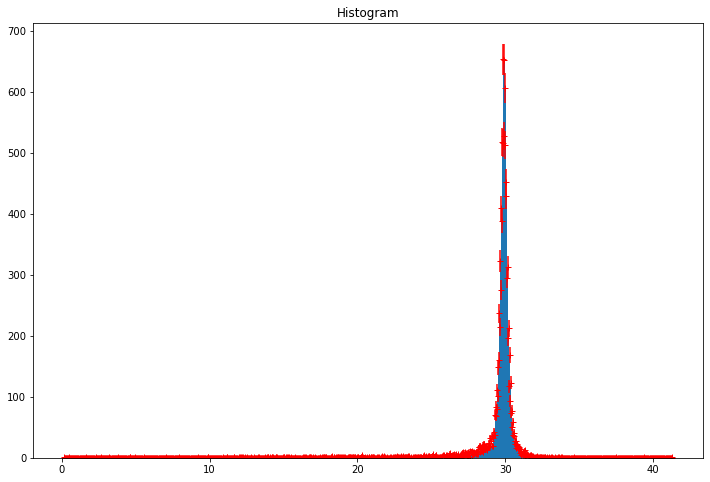

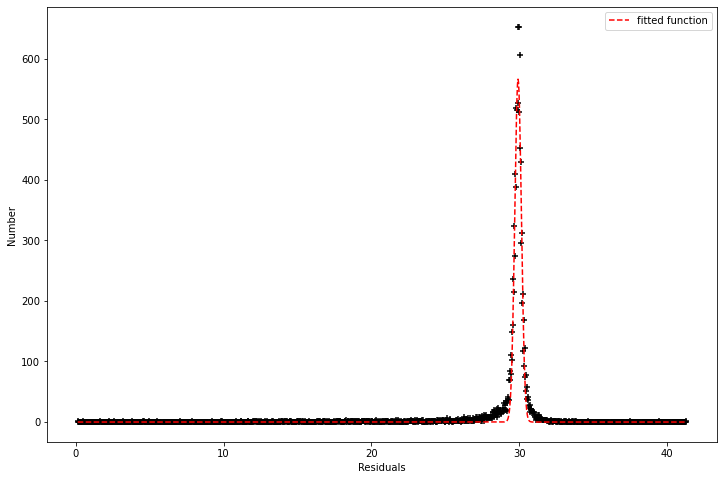

In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
from matplotlib.pyplot import figure
from scipy import stats

filename = 'residuals_261.pkl'
with open(filename, 'rb') as f:
    data = pickle.load(f)
data = data.reshape(1)[0]['residuals']
data = data[data>-30] + 30   #Filtering the data

plt.figure(figsize=(12,8))
y,edges,_=plt.hist(data,bins='auto')
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, y, yerr=y**(1/2), fmt='+',color='r')
plt.title("Histogram")


def f(x_data,a, mu, sig):
    return a* np.exp(-(x_data - mu) ** 2 / (2 * sig ** 2))

plt.figure(figsize=(12,8))
x_data = bin_centers
y_data = y

popt, pcov = curve_fit(f, x_data, y_data, p0=[600,30,1], maxfev=5000)
plt.scatter(x_data,y_data, marker='+', color='black')
plt.plot(x_data, f(x_data, popt[0], popt[1],popt[2]),'r--', label='fitted function')
plt.legend(loc='best')
plt.xlabel('Residuals')
plt.ylabel('Number')



#GoodNess of the Fit

cov = np.cov(x_data, y_data, ddof=2)
b_hat = cov[0, 1] / cov[0, 0]
a_hat = np.mean(y_data - b_hat * x_data)
ssr = np.sum((y_data - a_hat - b_hat * x_data)**2)
tss = np.sum((np.mean(y_data) - y_data)**2)

rsq = 1 - ssr / tss

print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x_data,y_data)) # check with the correlation matrix that R is the correlation coefficient

sigma_y = np.sqrt(np.abs(y_data)) 

ndof = len(x_data) - 1
print("n degrees of freedom =", ndof)
# calculate the chi^2
chi2 = np.sum(((y_data - (a_hat + b_hat * x_data))**2) / sigma_y)
print("chi2 =", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

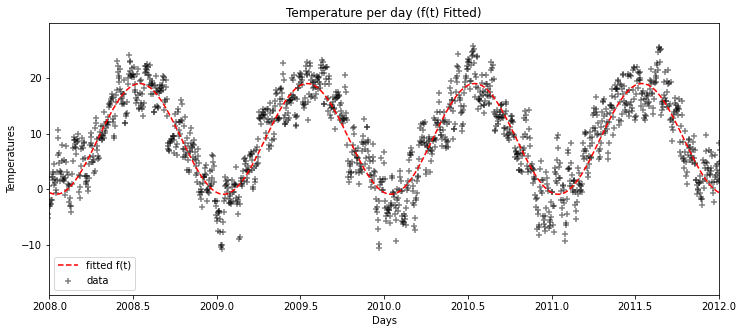

The Best Fit values of the Parameters are:
 [-9.95564177 -0.2529529   9.04061038]

The overal average temperature in munich is:,
 8.934429233423996

The daily average predicted by the model for the hottest time of the year is:
 18.996252147069484

The daily average predicted by the model for the coldest time of the year is:
 -0.9150313857269925

The parameter b is just a shift along x axis, and we know sin and cos functions are pi/2 different in this parameter

The RSS for g is:
 -496205.7449317182
The RSS for f is:
 -798969.2372456293

Test f vs g result:
CL: 1.000 , additional parameter necessary: NO

According to the Fisher_F test extra parameter is not neccessary


In [4]:
import pandas as pd
from scipy.optimize import minimize
from scipy import stats

def seperator_Days(x): 
    return float(x.split(" ")[0])
def seperator_Temps(x): 
    return float(x.split(" ")[1])

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


"""Loading and Pre_Processing The Data"""

df= pd.read_csv("munich_temperatures_average_with_bad_data.txt")
df['Days']= pd.Series(df['1995.00274 0.944444'].apply(seperator_Days), index=df.index)
df['Temperatures']= pd.Series(df['1995.00274 0.944444'].apply(seperator_Temps), index=df.index)
df= df.drop(['1995.00274 0.944444'], axis=1)
df= df[df['Temperatures']<40]
df= df[-25<df['Temperatures']]

Days= np.array(df['Days'])
Temps= np.array(df['Temperatures'])

fig, ax= plt.subplots(1, 1, figsize=(12,5))



"""FITTING Funciton"""

def f(Days,a,b,c):
    return a* np.cos(2*np.pi*Days + b) + c
    
popt, pcov = curve_fit(f, Days, Temps, p0=[-20,0,10], maxfev=2000)
ax.scatter(Days,Temps, marker='+', color='0', alpha=0.5, label='data')
ax.plot(Days, f(Days, popt[0], popt[1], popt[2]),'r--', label='fitted f(t)')
ax.legend(loc='best')
ax.set_ylabel("Temperatures")
ax.set_xlabel("Days")
ax.set_xlim(2008,2012)
ax.set_title('Temperature per day (f(t) Fitted)')
plt.show()

print("The Best Fit values of the Parameters are:\n", popt)
print("\nThe overal average temperature in munich is:,\n", np.average(Temps))

def Fitted_f(t): return popt[0]* np.cos(2*np.pi*t + popt[1]) + popt[2]
def Neg_Fitted_f(t): return -(popt[0]* np.cos(2*np.pi*t + popt[1]) + popt[2])

min_pred = Fitted_f(minimize(Fitted_f, 2015).x)
max_pred = Neg_Fitted_f(minimize(Neg_Fitted_f, 2015).x)
print("\nThe daily average predicted by the model for the hottest time of the year is:\n", -max_pred[0])
print("\nThe daily average predicted by the model for the coldest time of the year is:\n", min_pred[0])
print("\nThe parameter b is just a shift along x axis, and we know sin and cos functions are pi/2 different in this parameter")


def g(Days,a,b,c,d):
    return a* np.cos(2*np.pi*b*Days + c) + d
popt, pcov = curve_fit(g, Days, Temps, p0=[-20,1,2,10], maxfev=2000)

def Fitted_g(t): return popt[0]* np.cos(2*np.pi*popt[1]*t + popt[2]) + popt[3]



"""RSS and The Fisher_F Test"""

RSS_g = np.sum((Temps - Fitted_g(Days)**2))
RSS_f = np.sum((Temps - Fitted_f(Days)**2))
print("\nThe RSS for g is:\n", RSS_f)
print("The RSS for f is:\n", RSS_g)

ndof_f = 3-1
ndof_g = 4-1

print("\nTest f vs g result:")
cl_g_vs_f = Ftest(RSS_f, RSS_g, ndof_f, ndof_g, 6667, verbose=True)
print("\nAccording to the Fisher_F test extra parameter is not neccessary")